In [2]:
import numpy as np
import pywt

In [3]:
def smooth_pad(vector, pad_width):
    """Smoothly extend a 1D vector on both ends.

    Parameters
    ----------
    vector : ndarray
        The input 1D array to pad.
    pad_width : tuple
        A tuple of two integers indicating the number of elements to pad
        on the left and right sides, respectively.

    Returns
    -------
    padded_vector : ndarray
        The smoothly padded 1D array.
    """
    # 创建新的填充数组
    padded_vector = np.zeros(len(vector) + pad_width[0] + pad_width[1])
    
    # 填充原始数组
    padded_vector[pad_width[0]:pad_width[0] + len(vector)] = vector

    # Smooth extension to the left
    left_value = padded_vector[pad_width[0]]
    if pad_width[0] > 0:  # 确保有填充宽度
        left_slope = left_value - padded_vector[pad_width[0] + 1]
        padded_vector[:pad_width[0]] = left_value + np.arange(pad_width[0], 0, -1) * left_slope

    # Smooth extension to the right
    right_value = padded_vector[-pad_width[1] - 1]
    if pad_width[1] > 0:  # 确保有填充宽度
        right_slope = right_value - padded_vector[-pad_width[1] - 2]
        padded_vector[-pad_width[1]:] = right_value + np.arange(1, pad_width[1] + 1) * right_slope

    return padded_vector

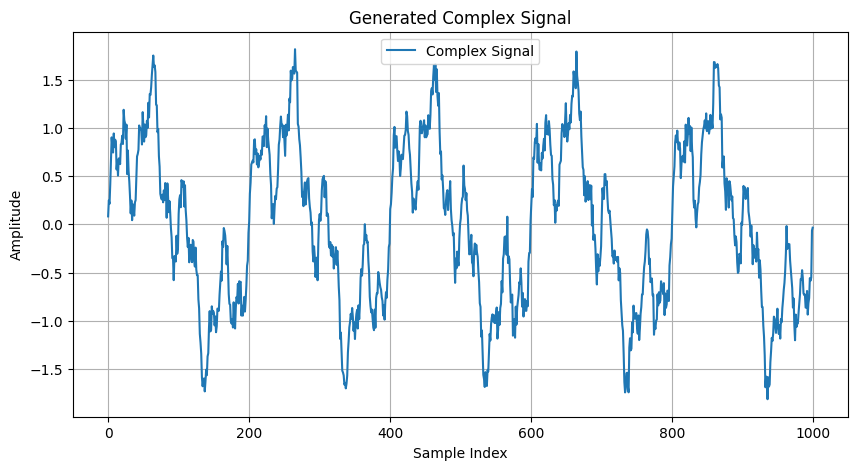

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def generate_complex_signal(length=1000, noise_level=0.1):
    """生成一个复杂信号，结合多个频率成分和噪声。

    Parameters
    ----------
    length : int
        信号的长度。
    noise_level : float
        噪声的强度。

    Returns
    -------
    signal : ndarray
        生成的复杂信号。
    """
    # 时间轴
    t = np.linspace(0, 1, length)
    
    # 组合多个频率成分
    signal = (np.sin(2 * np.pi * 5 * t) +  # 5 Hz 正弦波
              0.5 * np.sin(2 * np.pi * 20 * t) +  # 20 Hz 正弦波
              0.3 * np.sin(2 * np.pi * 50 * t))  # 50 Hz 正弦波

    # 添加随机噪声
    noise = noise_level * np.random.normal(size=length)
    signal += noise

    return signal

# 示例用法
if __name__ == "__main__":
    complex_signal = generate_complex_signal()
    
    # 绘制生成的复杂信号
    plt.figure(figsize=(10, 5))
    plt.plot(complex_signal, label='Complex Signal')
    plt.title('Generated Complex Signal')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    plt.show()


In [5]:
x = complex_signal
pad_width = (100,100)  # 左侧和右侧各填充2个元素
# 自定义平滑填充
padded_x_custom = smooth_pad(x, pad_width)
# 使用 PyWavelets 的平滑填充
padded_x_pywt = pywt.pad(x, pad_width, mode='smooth')
# 打印和比较结果
print("自定义平滑填充结果:", padded_x_custom)
print("PyWavelets 平滑填充结果:", padded_x_pywt)
# 验证是否相等
if np.array_equal(padded_x_custom, padded_x_pywt):
    print("结果一致！")
else:
    print("结果不一致！")


自定义平滑填充结果: [-16.47875447 -16.31314181 -16.14752914 ...   2.81984692   2.84897524
   2.87810357]
PyWavelets 平滑填充结果: [-16.47875447 -16.31314181 -16.14752914 ...   2.81984692   2.84897524
   2.87810357]
结果一致！
